#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import classification_report

In [5]:
#!pip install nltk
#!pip install wordcloud

In [6]:
import nltk

In [7]:
#read the dataset
df_dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [8]:
#concise summary of dataframe
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#display the first five rows of dataframe
df_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
#display the last five rows of dataframe
df_dataset.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [11]:
#shape of the dataframe
df_dataset.shape

(5572, 5)

In [12]:
#check for any null values
df_dataset.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
#drop the columns with null values
df_dataset=df_dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [14]:
#check for any duplicates
df_dataset.duplicated().sum()

403

In [15]:
#remove the duplicates
df_dataset=df_dataset.drop_duplicates(keep='first')

In [16]:
df_dataset.duplicated().sum()

0

In [17]:
#rename the column names
df_dataset.rename(columns={'v1':'message_type','v2':'message'},inplace=True)

In [18]:
print("****** Null values:","********\n")
print(df_dataset.isna().sum(),'\n')
print('****** No.of duplicates=',df_dataset.duplicated().sum())

****** Null values: ********

message_type    0
message         0
dtype: int64 

****** No.of duplicates= 0


In [19]:
#encode the target column named 'message_type'
encoder=LabelEncoder()
df_dataset['message_type']=encoder.fit_transform(df_dataset['message_type'])

#### Exploratory Data Analysis

In [20]:
df_dataset.head()

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df_dataset['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

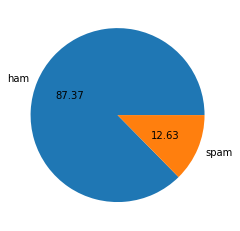

In [22]:
plt.pie(df_dataset['message_type'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

##### The dataset is imbalanced

In [23]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [24]:
df_dataset['num_chara']=df_dataset['message'].apply(lambda x:len(x))
df_dataset['num_words']=df_dataset['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df_dataset['num_sentences']=df_dataset['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df_dataset.head()

,message_type,message,num_chara,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
#statistical summary of ham messages
df_dataset[df_dataset['message_type']==0][['num_chara', 'num_words', 'num_sentences']].describe()

,num_chara,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#statistical summary of spam messages
df_dataset[df_dataset['message_type']==1][['num_chara', 'num_words', 'num_sentences']].describe()

,num_chara,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


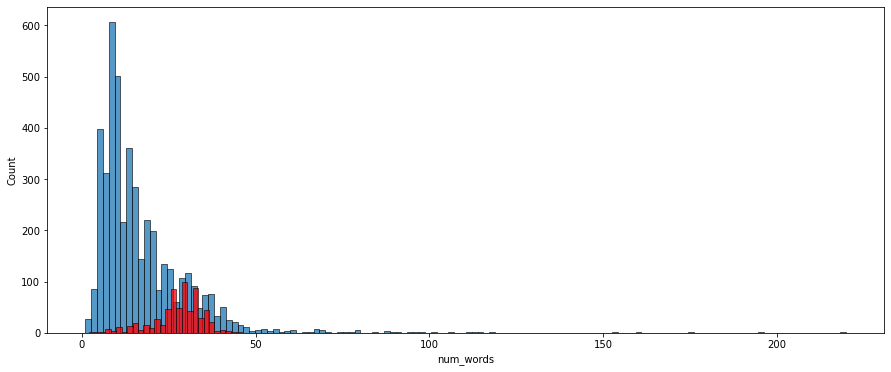

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(df_dataset[df_dataset['message_type'] == 0]['num_words'])
sns.histplot(df_dataset[df_dataset['message_type'] == 1]['num_words'],color='red');

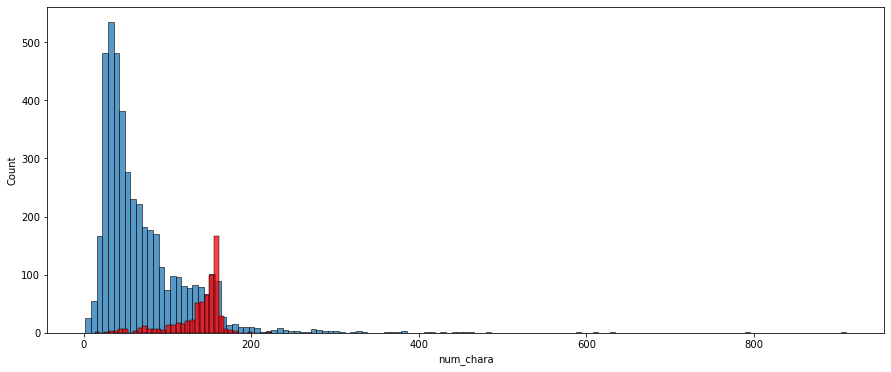

In [29]:
plt.figure(figsize=(15,6))
sns.histplot(df_dataset[df_dataset['message_type'] == 0]['num_chara'])
sns.histplot(df_dataset[df_dataset['message_type'] == 1]['num_chara'],color='red');

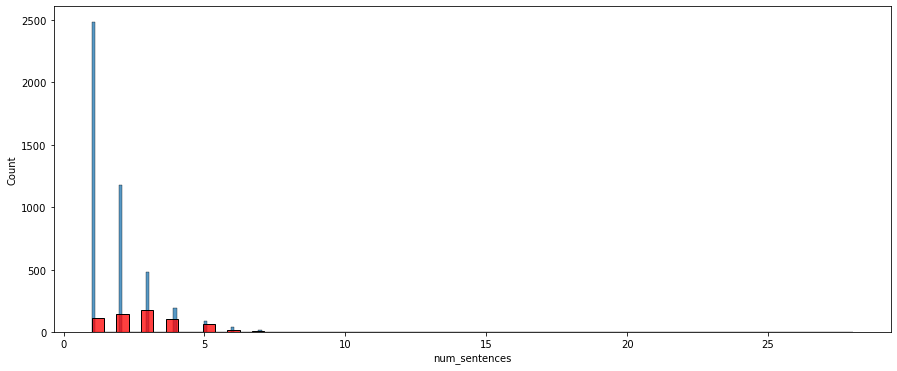

In [30]:
plt.figure(figsize=(15,6))
sns.histplot(df_dataset[df_dataset['message_type'] == 0]['num_sentences'])
sns.histplot(df_dataset[df_dataset['message_type'] == 1]['num_sentences'],color='red');

In [31]:
#from the above plots we can infer that the spam messages are having less number of words,
#characters and sentences compared to ham messages

#### Data Preprocessing

In [32]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [33]:
from nltk.stem.porter import PorterStemmer

In [34]:
ps=PorterStemmer()

In [35]:
def transform_message(messages):
    messages=re.sub('[^a-zA-Z0-9]',' ',messages)
    messages=messages.lower()
    messages=messages.split()
    messages=[ps.stem(word)for word in messages if not word in stopwords.words('english')]
    messages=' '.join(messages)
    return messages

In [36]:
df_dataset['transformed_message'] = df_dataset['message'].apply(transform_message)

In [37]:
df_dataset.head()

,message_type,message,num_chara,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [39]:
spam_wc=df_dataset[df_dataset['message_type']==1]['transformed_message'].str.cat(sep=" ")

In [40]:
spam_wc=wc.generate(spam_wc)

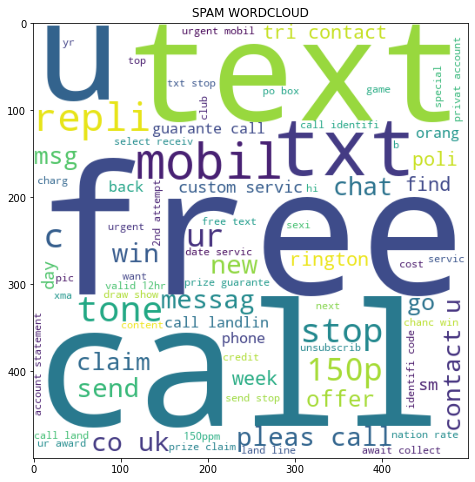

In [41]:
plt.figure(figsize=(8,8))
plt.title('SPAM WORDCLOUD')
plt.imshow(spam_wc)
plt.show()

In [42]:
ham_wc=df_dataset[df_dataset['message_type']==0]['transformed_message'].str.cat(sep=" ")

In [43]:
ham_wc=wc.generate(ham_wc)

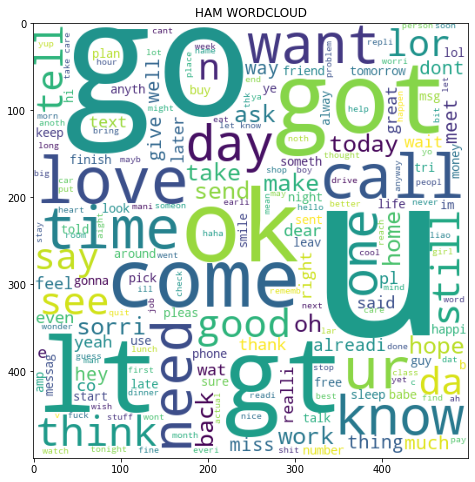

In [44]:
plt.figure(figsize=(8,8))
plt.title('HAM WORDCLOUD')
plt.imshow(ham_wc)
plt.show()

#### Word Embedding

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X=tfidf.fit_transform(df_dataset['transformed_message']).toarray()
y=df_dataset['message_type'].values                     

### Modelling

##### Balancing the dataset

In [47]:
df_dataset['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=42)

In [50]:
X_train,y_train=os.fit_resample(X_train,y_train)

In [51]:
pd.DataFrame(y_train).value_counts()

0    3627
1    3627
dtype: int64

In [58]:
models = {
    'support vector classifier' : SVC(kernel='rbf'),
    'KNeighbors classifier' : KNeighborsClassifier(), 
    'MultinomialNB': MultinomialNB(), 
    'Decision Tree': DecisionTreeClassifier(), 
    'Logistic regression': LogisticRegression(), 
    'Random Forest': RandomForestClassifier(), 
    'AdaBoost': AdaBoostClassifier(), 
    'Bagging classifier':BaggingClassifier(), 
    'Extra trees classifier': ExtraTreesClassifier(),
    'Gradient boosting':GradientBoostingClassifier(),
    'xgb classifier':XGBClassifier()
}

In [59]:
def evaluate_train_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    accuracy=accuracy_score(true, predicted)
    
    return mae, rmse,accuracy

In [60]:
def evaluate_test_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    accuracy=accuracy_score(true, predicted)
    recall=recall_score(true, predicted)
    precision=precision_score(true, predicted)
    confus_matrix=confusion_matrix(true, predicted)
    class_report=classification_report(true, predicted)
    
    return mae, rmse,accuracy,recall,precision,confus_matrix,class_report

In [61]:
model_list=[]
accuracy_scores=[]
recall_scores=[]
precision_scores=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    #train the model
    model.fit(X_train,y_train)
    
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    
     # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse,model_train_acc= evaluate_train_model(y_train, y_train_pred)

    test_mae,test_rmse,test_acc,test_recall,test_prec,con_matrix,classficn_report = evaluate_test_model(y_test, y_test_pred)
    
    print(list(models.keys())[i],'\n')
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Accuracy: {:.4f}".format(model_train_acc))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- Accuracy: {:.4f}".format(test_acc))
    print("confusion_matrix",con_matrix)
    print("classification_report",classficn_report)
    
    accuracy_scores.append(test_acc)
    recall_scores.append(test_recall)
    precision_scores.append(test_prec)
    
    print('='*45)
    print('\n')
    
    

support vector classifier 

Model performance for Training set
- Root Mean Squared Error: 0.0389
- Mean Absolute Error: 0.0015
- Accuracy: 0.9985
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1319
- Mean Absolute Error: 0.0174
- Accuracy: 0.9826
confusion_matrix [[888   1]
 [ 17 128]]
classification_report               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



KNeighbors classifier 

Model performance for Training set
- Root Mean Squared Error: 0.2084
- Mean Absolute Error: 0.0434
- Accuracy: 0.9566
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4172
- Mean Absolute Error: 0.1741
- Accuracy: 0.8259
confusion_matrix [[752 

In [66]:
model_performances = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Recall':recall_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [67]:
model_performances

,Algorithm,Accuracy,Recall,Precision
5,Random Forest,0.988395,0.917241,1.000000
8,Extra trees classifier,0.983559,0.889655,0.992308
0,support vector classifier,0.982592,0.882759,0.992248
10,xgb classifier,0.976789,0.931034,0.906040
4,Logistic regression,0.973888,0.917241,0.898649
6,AdaBoost,0.968085,0.944828,0.845679
2,MultinomialNB,0.966151,0.944828,0.835366
7,Bagging classifier,0.962282,0.937931,0.819277
3,Decision Tree,0.957447,0.903448,0.813665
9,Gradient boosting,0.946809,0.931034,0.750000


In [69]:
#from the model performance table,giving prior importance to precision with good accuracy,
#random forest classifier performs well.

#### Data Prediction

In [68]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.65


#### Pickle the model

In [70]:
import pickle

In [71]:
#dump information to the file where we want to store the data
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))